<a href="https://colab.research.google.com/github/hc0rd31r0/imersao-dados/blob/main/imersaoDados3_aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 3 - Correlações, Causalidade e relações entre genes
## Imersão Dados 3

In [1]:
import pandas as pd

url_dados_web = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados_web, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [2]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)


**Para lembrar:**

*   **Variáveis g**: representam diferentes expressões gênicas, que são como pedaços do nosso código genético (DNA) que dão origem a proteínas específicas ou RNA;
*   **Variáveis c**: representam diferentes tipos de tecidos celulares e sua viabilidade celular frente aos compostos. Podem variar desde tecidos cancerígenos de diversos tipos até tecidos saudáveis oriundos dos vários sistemas do organismo humano.

In [3]:
#Tabela de frequência - pandas.crosstab
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [4]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [5]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize=True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [6]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [7]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [8]:
dados[['g-0', 'g-3', 'g-8']]

,g-0,g-3,g-8
0,1.0620,-0.6208,0.5548
1,0.0743,0.0604,-0.4047
2,0.6280,-0.0764,0.0065
3,-0.5138,0.5288,-0.1321
4,-0.3254,0.6919,-0.8789
...,...,...,...
23809,0.1394,-0.5080,-0.4726
23810,-1.3260,0.9905,0.5112
23811,0.3942,-0.7389,-0.0340
23812,0.6660,0.2044,0.4299


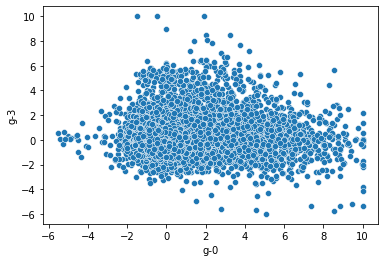

In [9]:
import seaborn as sns
#gráfico de dispersão
sns.scatterplot(x='g-0', y='g-3', data=dados)

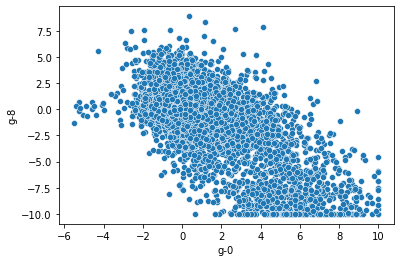

In [10]:
sns.scatterplot(x='g-0', y='g-8', data=dados)

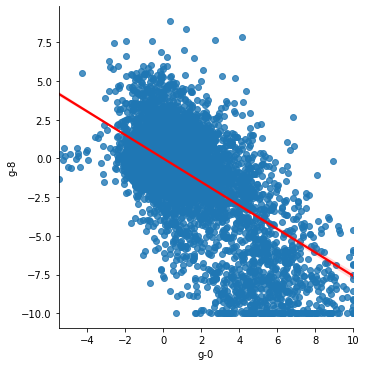

In [11]:
#essa análise compara toda a base de dados, como dosagem, tempo, tratamento (vamos refinar isso)
#outro gráfico de dispersão com uma linha de tendência
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'})

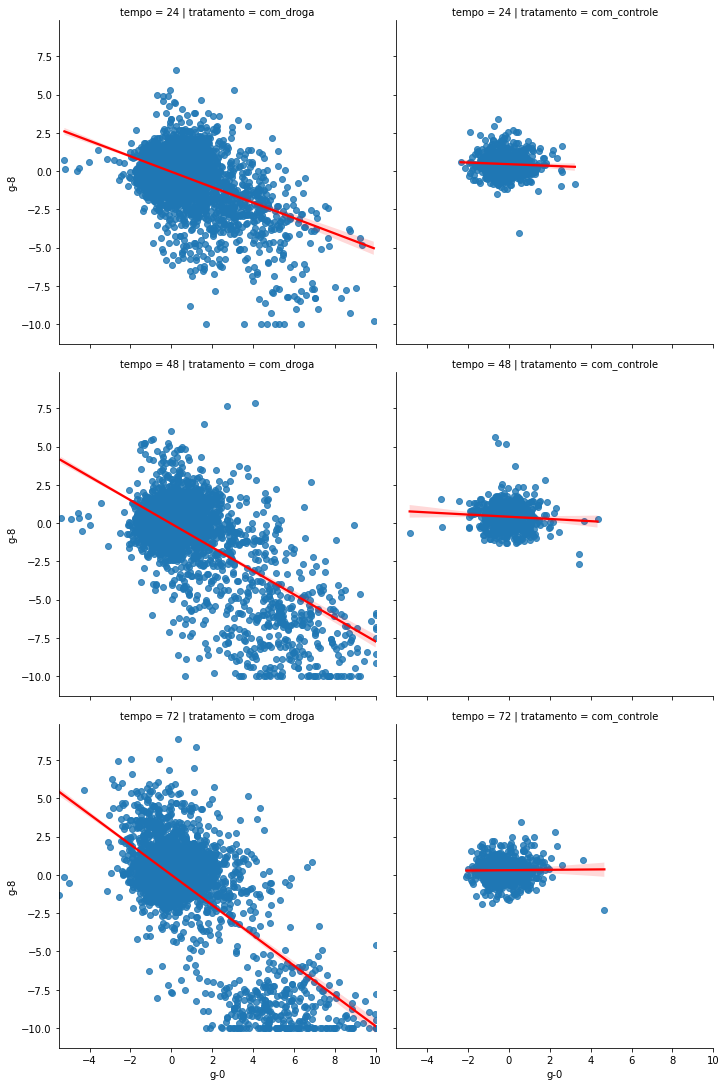

In [12]:
#começando a comparar com a coluna tratamento e tempo
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo' )

In [13]:
#correlação
dados.loc[:,'g-0':'g-771'].corr()
#quando a correlação for próxima a -1 e +1, variáveis altamente correlacionadas
#quando a correlação for 0 (zero), as variáveis não são correlacionadas (não se afetam)
#o que significa a correlação negativa (são inversamente proporcionais) quando uma sobe a outra desce

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

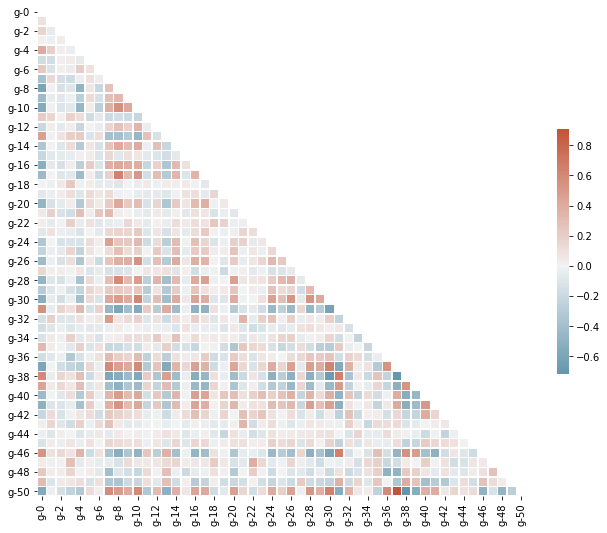

In [14]:
#pesquisar no google 'correlation matrix seaborn'  (mapa de calor)
# Compute the correlation matrix
corr = dados.loc[:,'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
import numpy as np
import matplotlib.pyplot as plt

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# vmax=.3, remoovido para não limitar o gráfico
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
#uma correlação alta, dá uma indicação de estudo, ex.: g-37,g-50
dados.loc[:,'g-37':'g-50'].corr()

,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
g-37,1.000000,-0.704836,-0.501480,0.398989,0.418260,0.145261,0.127756,0.032476,0.115128,-0.479877,-0.148202,-0.484635,-0.338690,0.907061
g-38,-0.704836,1.000000,0.541459,-0.527399,-0.520954,-0.215705,-0.112496,0.012677,-0.250440,0.562659,0.038034,0.233732,0.398541,-0.714947
g-39,-0.501480,0.541459,1.000000,-0.456063,-0.427049,-0.224381,-0.060103,-0.042507,-0.216778,0.482675,-0.002309,0.188645,0.265437,-0.533741
g-40,0.398989,-0.527399,-0.456063,1.000000,0.512243,0.395169,0.000942,-0.186638,0.223448,-0.380471,0.202307,0.073462,-0.388199,0.380612
g-41,0.418260,-0.520954,-0.427049,0.512243,1.000000,0.155136,0.032897,-0.007711,0.149769,-0.494920,0.006772,-0.066663,-0.290614,0.407756
g-42,0.145261,-0.215705,-0.224381,0.395169,0.155136,1.000000,0.057617,-0.233770,0.131999,-0.162035,0.093882,0.086623,-0.320365,0.060542
g-43,0.127756,-0.112496,-0.060103,0.000942,0.032897,0.057617,1.000000,-0.023568,0.083707,0.071613,-0.163788,-0.066321,-0.102816,0.163383
g-44,0.032476,0.012677,-0.042507,-0.186638,-0.007711,-0.233770,-0.023568,1.000000,0.004279,-0.097154,-0.121546,-0.096411,0.117875,0.092644
g-45,0.115128,-0.250440,-0.216778,0.223448,0.149769,0.131999,0.083707,0.004279,1.000000,-0.179866,0.068780,0.033818,-0.145639,0.133507
g-46,-0.479877,0.562659,0.482675,-0.380471,-0.494920,-0.162035,0.071613,-0.097154,-0.179866,1.000000,0.045385,0.102473,0.273371,-0.481296


[Spurious Correlations](https://www.tylervigen.com/spurious-correlations)
Apresenta gráfico de informações altamente correlacionadas, mas que com certeza uma não afeta a outra

In [16]:
#O valor da coluna C-?, indica a viabilidade celular (indica o sucesso do experimento)
#principalmente seria a quantidade de células que sobreviveram a (tempo, dose, tratamento)
corr_celular = dados.loc[:,'c-0':'c-50'].corr()
corr_celular

#Pré-registro de pesquisa para evitar o p-hacking

#paper - são publicações de pesquisas que deram certo
#Existem revistas que publicam o que não deu certo para "poupar tempo" dos cientistas


,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49,c-50
c-0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,0.850533,0.832837,0.808033,0.836838,0.823716,0.827496,0.788947,0.831436,0.797051,0.796719,0.818420,0.823586,0.717807,0.805687,0.836447,0.837448,0.815484,0.840909,0.824231,0.807981,0.818558,0.855363,0.831066,0.820803,0.828947,0.829693,0.839386,0.774960,0.806885,0.849807,0.847857,0.848941,0.847747,0.827377,0.847072,0.824247,0.816332,0.819386,0.778280,0.792811,0.797689
c-1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,0.866297,0.884532,0.861089,0.880177,0.820911,0.857797,0.771984,0.843076,0.861134,0.820399,0.837626,0.852621,0.756086,0.812062,0.874647,0.829208,0.887230,0.853246,0.861559,0.789314,0.816042,0.889619,0.837788,0.866130,0.865169,0.840517,0.877007,0.779697,0.890506,0.835689,0.891745,0.870896,0.891842,0.869508,0.851121,0.858537,0.828145,0.854667,0.853745,0.845159,0.839386
c-2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,0.892033,0.904968,0.879638,0.910497,0.841421,0.884464,0.800587,0.879281,0.881011,0.824149,0.853648,0.878793,0.761439,0.832908,0.887800,0.859023,0.899897,0.879307,0.876141,0.824171,0.851934,0.906052,0.850681,0.890263,0.880173,0.852595,0.887820,0.799599,0.905449,0.866557,0.909829,0.889876,0.909086,0.886977,0.880717,0.875814,0.854217,0.874174,0.863002,0.853704,0.848724
c-3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465,0.828218,0.803839,0.822104,0.788432,0.818493,0.758345,0.804018,0.806834,0.781198,0.791121,0.816744,0.742109,0.792355,0.828853,0.829277,0.807726,0.816247,0.818892,0.790481,0.796522,0.830602,0.796222,0.804081,0.811296,0.805880,0.820989,0.747433,0.813351,0.827805,0.833075,0.821351,0.838118,0.821934,0.813087,0.806219,0.808859,0.812784,0.804207,0.818632,0.821138
c-4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,0.890057,0.904082,0.870384,0.911130,0.839991,0.879147,0.779366,0.879616,0.893702,0.807685,0.833680,0.885335,0.768383,0.854108,0.872477,0.872339,0.900002,0.869316,0.875701,0.808720,0.851560,0.901149,0.836846,0.891190,0.865017,0.851393,0.887747,0.792168,0.900725,0.870204,0.904528,0.880368,0.913242,0.875934,0.878659,0.869324,0.862019,0.862095,0.862338,0.855029,0.851843
c-5,0.844469,0.869569,0.882794,0.829550,0.883526,1.000000,0.863932,0.794140,0.875615,0.810827,0.874461,0.883338,0.852764,0.877659,0.824086,0.865703,0.773152,0.843611,0.870892,0.819537,0.835350,0.866518,0.798246,0.833151,0.871687,0.866063,0.878555,0.854136,0.862635,0.803969,0.831032,0.874491,0.827969,0.858202,0.868679,0.842427,0.879457,0.766335,0.872094,0.862231,0.886947,0.880703,0.897040,0.876421,0.860547,0.855910,0.841310,0.862328,0.861956,0.851853,0.864223
c-6,0.811946,0.876924,0.898819,0.805506,0.893285,0.863932,1.000000,0.796485,0.873232,0.839685,0.884135,0.887255,0.867589,0.900492,0.839245,0.875685,0.768282,0.880802,0.895716,0.800826,0.850150,0.871791,0.752278,0.826409,0.876337,0.839224,0.897879,0.864267,0.878512,0.790123,0.859702,0.893770,0.821142,0.914730,0.868987,0.839136,0.857850,0.766112,0.910617,0.844998,0.898693,0.895083,0.908299,0.860556,0.874571,0.873974,0.828976,0.863283,0.857008,0.847009,0.825720
c-7,0.793171,0.793199,0.812980,0.752940,0.808096,0.794140,0.796485,1.000000,0.812357,0.728066,0.833612,0.810875,0.799748,0.821206,0.803563,0.820307,0.748862,0.817198,0.769116,0.779457,0.803508,0.787533,0.690031,0.773441,0.799476,0.790698,0.793321,0.816966,0.778022,0.775747,0.806346,0.824469,0.811058,0.829506,0.807257,0.803313,0.791785,0.735452,0.797602,0.810038,0.811687,0.817912,0.832790,0.783834,0.838290,0.811981,0.779971,0.799859,0.766085,0.766224,0.760949
c-8,0.842977,0.879892,0.896087,0.830369,0.888384,0

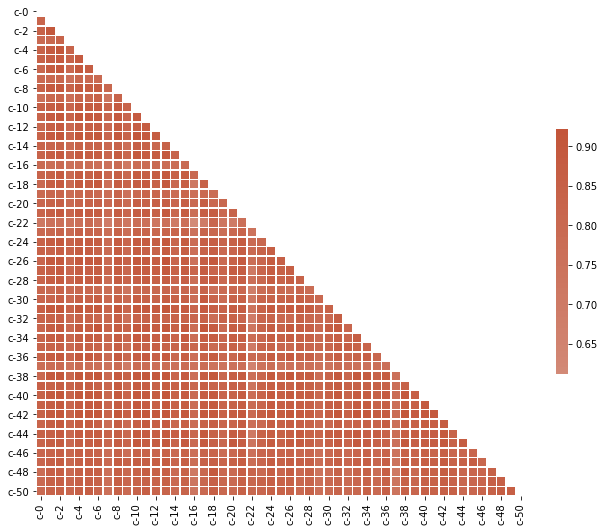

In [17]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

###Desafios da aula 03

---
**Desafio 01**: Criar tabelas de frequência com pandas.groupby()

**Desafio 02**: Normalizar o crosstab pela coluna

**Desafio 03**: Explorar outros agregadores.

**Desafio 04**: Explorar o melt.

**Desafio 05**: Calcular e analisar a correlação entre os G's e C's da base de dados. Refletir sobre os efeitos biológicos.

**Desafio 06**: Estudar o código que plota a matriz de correlação (heatmap)

**Desafio 07**: Resumo do que você aprendeu com os dados

---




In [18]:
#Desafio 01
dadosGroupBy = dados.groupby(by=['dose', 'tempo', 'tratamento']).count()
dadosGroupBy

id  composto   g-0   g-1  ...  c-96  c-97  c-98  c-99
dose tempo tratamento                                ...                        
D1   24    com_controle   301       301   301   301  ...   301   301   301   301
           com_droga     3585      3585  3585  3585  ...  3585  3585  3585  3585
     48    com_controle   343       343   343   343  ...   343   343   343   343
           com_droga     4011      4011  4011  4011  ...  4011  4011  4011  4011
     72    com_controle   307       307   307   307  ...   307   307   307   307
           com_droga     3600      3600  3600  3600  ...  3600  3600  3600  3600
D2   24    com_controle   305       305   305   305  ...   305   305   305   305
           com_droga     3581      3581  3581  3581  ...  3581  3581  3581  3581
     48    com_controle   305       305   305   305  ...   305   305   305   305
           com_droga     3591      3591  3591  3591  ...  3591  3591  3591  3591
     72    com_controle   305       305   305   305  ...   305   305   305   305
           com_droga     3580      3580  3580  3580  ...  3580  3580  3580  3580

[12 rows x 874 columns]

In [19]:
dados.groupby(by=['dose', 'tempo', 'tratamento']).count()['id'].sum(level=[0,1,2]).unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [20]:
#Desafio 02
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

In [21]:
#Desafio 03

#Pandas groupby: 13 Functions To Aggregate (https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/?amp=1)
#De acordo com essa página existem 13 funções de agregação
#Mas não são todas que funcionam com pandas.crosstab()

pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [22]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='count', margins=True, margins_name='Total')

tratamento   com_controle  com_droga  Total
dose  tempo                                
D1    24              301       3585   3886
      48              343       4011   4354
      72              307       3600   3907
D2    24              305       3581   3886
      48              305       3591   3896
      72              305       3580   3885
Total                1866      21948  23814

In [23]:
#Desafio 04
dados.melt(['tratamento', 'dose', 'tempo'], ['g-0', 'g-1'])

,tratamento,dose,tempo,variable,value
0,com_droga,D1,24,g-0,1.0620
1,com_droga,D1,72,g-0,0.0743
2,com_droga,D1,48,g-0,0.6280
3,com_droga,D1,48,g-0,-0.5138
4,com_droga,D2,72,g-0,-0.3254
...,...,...,...,...,...
47623,com_droga,D2,24,g-1,-0.0636
47624,com_droga,D2,24,g-1,0.3478
47625,com_controle,D2,48,g-1,0.3756
47626,com_droga,D1,24,g-1,0.2324


In [24]:
#Desafio 05
correlacoes = dados.loc[:,'g-0':'c-99'].corr()
correlacoesFinal = correlacoes.loc['c-0':'c-99', 'g-0':'g-771']


In [25]:
correlacoesFinal

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
c-0,-0.624116,-0.037405,-0.168656,-0.037342,-0.403545,0.209358,-0.103316,0.486478,0.621422,0.435235,0.586035,-0.231425,0.345752,-0.455353,0.468143,0.041219,0.568077,0.511811,-0.032060,0.078310,0.443028,0.108853,0.085712,0.152211,0.456591,0.330978,0.496350,-0.177204,0.558456,0.367153,0.656611,-0.692572,0.211714,-0.084536,0.256107,-0.269916,0.145813,0.626157,-0.755459,-0.528145,...,-0.429262,0.588808,-0.233971,-0.082959,0.364226,0.058799,0.307816,0.327954,0.047980,0.176797,0.462447,0.426196,-0.742731,-0.402435,-0.366744,-0.083647,-0.295825,0.222649,-0.604615,-0.079019,-0.414335,0.079513,-0.314377,0.161953,0.180167,-0.105390,-0.297293,0.219748,0.773982,0.489295,-0.054505,0.162083,-0.609010,-0.441749,0.347544,-0.116224,-0.399458,0.101879,0.599133,-0.509795
c-1,-0.624810,-0.030558,-0.178692,-0.093505,-0.379840,0.198890,-0.079528,0.553859,0.601678,0.475424,0.643461,-0.270409,0.361244,-0.483859,0.478114,0.056521,0.564153,0.509560,-0.071016,0.029949,0.368740,0.144788,0.078909,0.167012,0.478737,0.292106,0.508493,-0.158347,0.580010,0.383963,0.703746,-0.695461,0.277929,-0.036666,0.208706,-0.200159,0.282088,0.705889,-0.794085,-0.537176,...,-0.431604,0.591056,-0.193954,-0.034960,0.265992,0.092229,0.373585,0.348084,0.033582,0.214438,0.527661,0.446052,-0.761864,-0.452019,-0.416495,-0.054203,-0.273798,0.297677,-0.613134,-0.065293,-0.436506,0.045118,-0.314071,0.212862,0.192816,-0.094439,-0.275168,0.105298,0.784535,0.580017,-0.046682,0.089522,-0.653083,-0.433142,0.402415,-0.077256,-0.446151,0.109868,0.627124,-0.513554
c-2,-0.639789,-0.039616,-0.176733,-0.085298,-0.392841,0.211988,-0.078782,0.565002,0.597372,0.488331,0.640281,-0.276064,0.357949,-0.491421,0.484984,0.072825,0.587143,0.511541,-0.058010,0.041212,0.407185,0.125998,0.062507,0.160576,0.499975,0.304229,0.550255,-0.170310,0.580436,0.390478,0.722014,-0.708771,0.287357,-0.042537,0.231382,-0.243065,0.263756,0.720190,-0.819262,-0.562878,...,-0.441646,0.632338,-0.203576,-0.042660,0.297476,0.068967,0.379238,0.351261,0.042410,0.196088,0.535071,0.469515,-0.792795,-0.455940,-0.410587,-0.040656,-0.283404,0.294138,-0.639580,-0.062382,-0.443022,0.030408,-0.295096,0.213105,0.202687,-0.093480,-0.271373,0.120903,0.800393,0.593035,-0.061631,0.094180,-0.669732,-0.464219,0.393142,-0.062198,-0.469979,0.075646,0.650477,-0.529152
c-3,-0.604041,0.011899,-0.156894,-0.029079,-0.357850,0.193327,-0.093048,0.520284,0.564174,0.454065,0.587696,-0.232065,0.330601,-0.450723,0.475338,0.049883,0.555897,0.488323,-0.020933,0.076050,0.395583,0.123346,0.096140,0.172537,0.453716,0.295243,0.513194,-0.177194,0.507051,0.347568,0.646316,-0.672488,0.289150,-0.122636,0.270989,-0.253685,0.186842,0.655762,-0.763876,-0.527457,...,-0.432637,0.590401,-0.212221,-0.079346,0.337035,0.048161,0.299862,0.316293,0.071071,0.156163,0.488243,0.418559,-0.755448,-0.400980,-0.365931,-0.064329,-0.304418,0.250746,-0.609495,-0.075384,-0.419961,0.062204,-0.288690,0.174535,0.185477,-0.128296,-0.290250,0.191123,0.754548,0.527729,-0.078319,0.118333,-0.611692,-0.455413,0.370731,-0.087770,-0.430197,0.042305,0.607691,-0.492582
c-4,-0.606231,-0.027014,-0.180127,-0.065964,-0.365118,0.206762,-0.055324,0.562647,0.545600,0.485965,0.622138,-0.260521,0.375820,-0.454998,0.491743,0.061464,0.573910,0.494453,-0.068624,0.015357,0.409882,0.147165,0.058114,0.168337,0.509640,0.304879,0.554534,-0.144067,0.553227,0.376674,0.707700,-0.694870,0.303024,-0.077581,0.303429,-0.237223,0.250828,0.706684,-0.818646,-0.549565,...,-0.445962,0.616673,-0.184301,-0.052599,0.300658,0.047971,0.375394,0.338664,0.039968,0.187692,0.516360,0.436941,-0.786431,-0.445463,

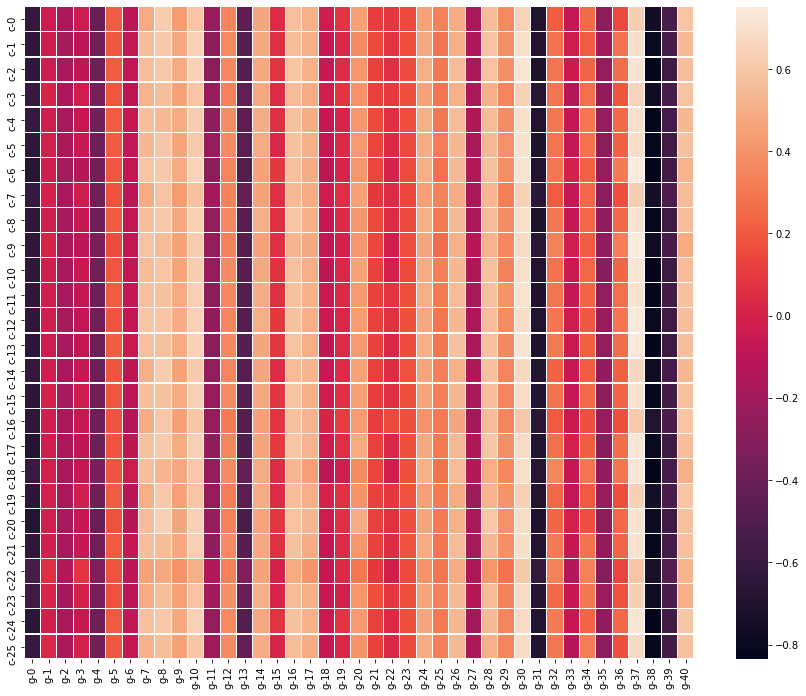

In [26]:
#Desafio 06
plt.subplots(figsize=(15, 12))
sns.heatmap(correlacoesFinal.loc['c-0':'c-25', 'g-0':'g-40'], linewidths=.25)

Desafio 07
